github: [ptonso](https://github.com/ptonso)

# Questionário 5 - Introdução a Ciência de Dados


In [36]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split

train = pd.read_csv('data/titanic/train.csv')
test = pd.read_csv('data/titanic/test.csv', index_col='PassengerId')

X_train = train.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'])
X_test = test.drop(columns=['Name', 'Ticket', 'Cabin'])
y_train = train['Survived']

def sample_imputation(column):
    return column.fillna(column.mode()[0] if column.dtype == 'object' else column.mean())

categorical_vars = ['Sex', 'Embarked', 'Pclass']
label_encoder = LabelEncoder()
for cat in categorical_vars:
    if cat in X_train.columns:
        X_train[cat] = label_encoder.fit_transform(X_train[cat])
        X_test[cat] = label_encoder.transform(X_test[cat])

X_train_test, X_validation_test, y_train_test, y_validation_test = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [1000, 1500, 2000],
    'max_depth': [2,3,5, 6], 
    'min_samples_split': [2, 3, 4, 5],
    'criterion': ['entropy']
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=1)
grid_search.fit(X_train_test, y_train_test)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

best_rf = grid_search.best_estimator_

y_hat_validation = best_rf.predict(X_validation_test)
acc_validation = accuracy_score(y_validation_test, y_hat_validation)
print(f"Validation accuracy: {acc_validation}")

best_rf.fit(X_train, y_train)

y_hat = best_rf.predict(X_test)

predictions = pd.DataFrame({
    'PassengerId': test.index,
    'Survived': y_hat
})

predictions.to_csv('data/titanic/predictions.csv', index=False)

print(predictions.head())


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 1000}
Best cross-validation score: 0.8272136314389836
Validation accuracy: 0.8156424581005587
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1


No kaggle, a predição alcançou $0.78229$ de acurácia.

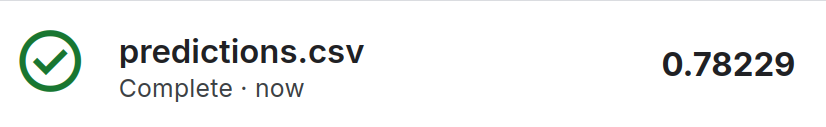

A idea foi usar o dataset de traino como traino e validação, e otimizei os hyperparametros do random forest para a validação. Rodei 3 vezes, ajustando os parâmetros do grid para convergir para as melhores opções.